In [ ]:
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials 

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1AVbnOfblP2lJTOowA1JFTZ-wS-wYc6b3'
downloaded = drive.CreateFile({'id': file_id})
downloaded = drive.CreateFile({'id':'1AVbnOfblP2lJTOowA1JFTZ-wS-wYc6b3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('cherat-final-dataset.csv')  
 


In [ ]:
pip install --user --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 15.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt


import statsmodels.graphics.tsaplots as sgt
#from sklearn import preprocessing
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import statsmodels.tsa.stattools as sts

from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse    
from statsmodels.tools.eval_measures import mse   
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

import statsmodels as smm
# from fbprophet import Prophet
import warnings 
warnings.filterwarnings ("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(smm.__version__)


0.10.2


In [ ]:
df = pd.read_csv('cherat-final-dataset.csv')

In [ ]:
def preprocessing(dataframe):
    df = dataframe.iloc[::-1]
    #df = df.drop(['Price', 'High', 'Low'], axis=1)
    df['Date']= pd.to_datetime(df['Date'], format= '%d/%m/%Y')  # datetime conversion.........
    df.set_index("Date", inplace= True) # created date as an index
    return df

In [ ]:
preprocessed_df = preprocessing(df)

In [ ]:
preprocessed_df.columns.values

array(['Price', 'Open', 'High', 'Low', 'Vol', 'Net_Margin', 'ROE',
       'Quick_Ratio', 'Current_Ratio', 'Assets_Equity', 'Debt_Equity',
       'A_RTurnover', 'AvgA_RDays', 'InvTurnover', 'EBITDATotAssetsTTM',
       'ROATotAssets', 'HistMktCap', 'HistEV', 'GDPExports',
       'Inflationgdp', 'moneysupply', 'treasures_bill', 'DollarRate_Open'],
      dtype=object)

In [ ]:
columns_names = ['Net_Margin', 'ROE',
       'Quick_Ratio', 'Current_Ratio', 'Assets_Equity', 'Debt_Equity',
       'A_RTurnover', 'AvgA_RDays', 'InvTurnover', 'EBITDATotAssetsTTM',
       'ROATotAssets', 'HistMktCap', 'HistEV', 'GDPExports',
       'Inflationgdp', 'moneysupply', 'treasures_bill', 'DollarRate_Open']

interpolate_df = []
for i in columns_names:
    a = preprocessed_df[i].interpolate(method='time')
#     plt.scatter(df.index, a,  alpha=0.5, color='red' )
#     plt.scatter(df.index, i,  alpha=0.5, color='blue')
    interpolate_df.append(a)

interpolate_df = pd.DataFrame(interpolate_df).T
df = pd.concat([preprocessed_df.Open, preprocessed_df.Vol, preprocessed_df.Price, preprocessed_df.High , preprocessed_df.Low  ,interpolate_df], axis = 1)

In [ ]:
df

,Open,Vol,Price,High,Low,Net_Margin,ROE,Quick_Ratio,Current_Ratio,Assets_Equity,Debt_Equity,A_RTurnover,AvgA_RDays,InvTurnover,EBITDATotAssetsTTM,ROATotAssets,HistMktCap,HistEV,GDPExports,Inflationgdp,moneysupply,treasures_bill,DollarRate_Open
Date,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,7.78,690400,8.50,8.50,7.50,0.039000,0.190000,0.150000,1.250000,2.090000,0.780000,25.600000,3.600000,0.700000,0.124300,0.034900,-0.071400,-0.099000,2.595000,20.670000,0.442,11.90,84.450000
2010-02-01,8.56,574600,7.67,8.85,7.47,0.020610,0.091220,0.134237,1.176441,2.095254,0.811525,23.445763,3.915254,0.752542,0.111637,0.029751,0.032897,0.009237,1.838915,19.758563,0.068,12.22,85.200000
2010-03-01,7.48,1490000,7.06,7.50,6.28,0.004000,0.002000,0.120000,1.110000,2.100000,0.840000,21.500000,4.200000,0.800000,0.100200,0.025100,0.127100,0.107000,1.156000,18.935329,2.150,12.34,85.150000
2010-04-01,7.30,1440000,7.24,7.63,6.88,-0.029022,-0.008783,0.103152,1.035870,2.140435,0.890543,19.815217,4.638043,0.732609,0.087362,0.016878,0.024632,0.071855,-4.618087,18.023892,1.783,12.27,84.000000
2010-05-01,7.36,658000,5.87,7.48,5.70,-0.060978,-0.019217,0.086848,0.964130,2.179565,0.939457,18.184783,5.061957,0.667391,0.074938,0.008922,-0.074532,0.037845,-10.205913,17.141856,-1.011,12.09,84.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,57.80,31500000,56.95,57.80,49.00,-0.084923,-0.032505,0.451429,1.255495,2.965934,1.736374,1.568132,56.825275,0.900000,0.105153,0.037725,-0.222818,-0.088673,-7.223484,8.616612,1.155,13.34,160.555041
2020-03-01,58.50,4060000,55.59,88.12,43.00,-0.076000,-0.029000,0.410000,1.230000,2.950000,1.730000,1.600000,55.200000,0.900000,0.103400,0.030300,-0.089800,-0.054000,-7.785000,8.615027,-4.711,11.19,162.180000
2020-04-01,55.26,2110000,89.85,98.50,53.31,-0.065217,-0.025967,0.396522,1.230000,2.960109,1.726630,1.903261,49.033696,0.933696,0.101917,0.021842,0.301272,0.030441,-15.866228,8.613333,5.406,7.88,163.770435


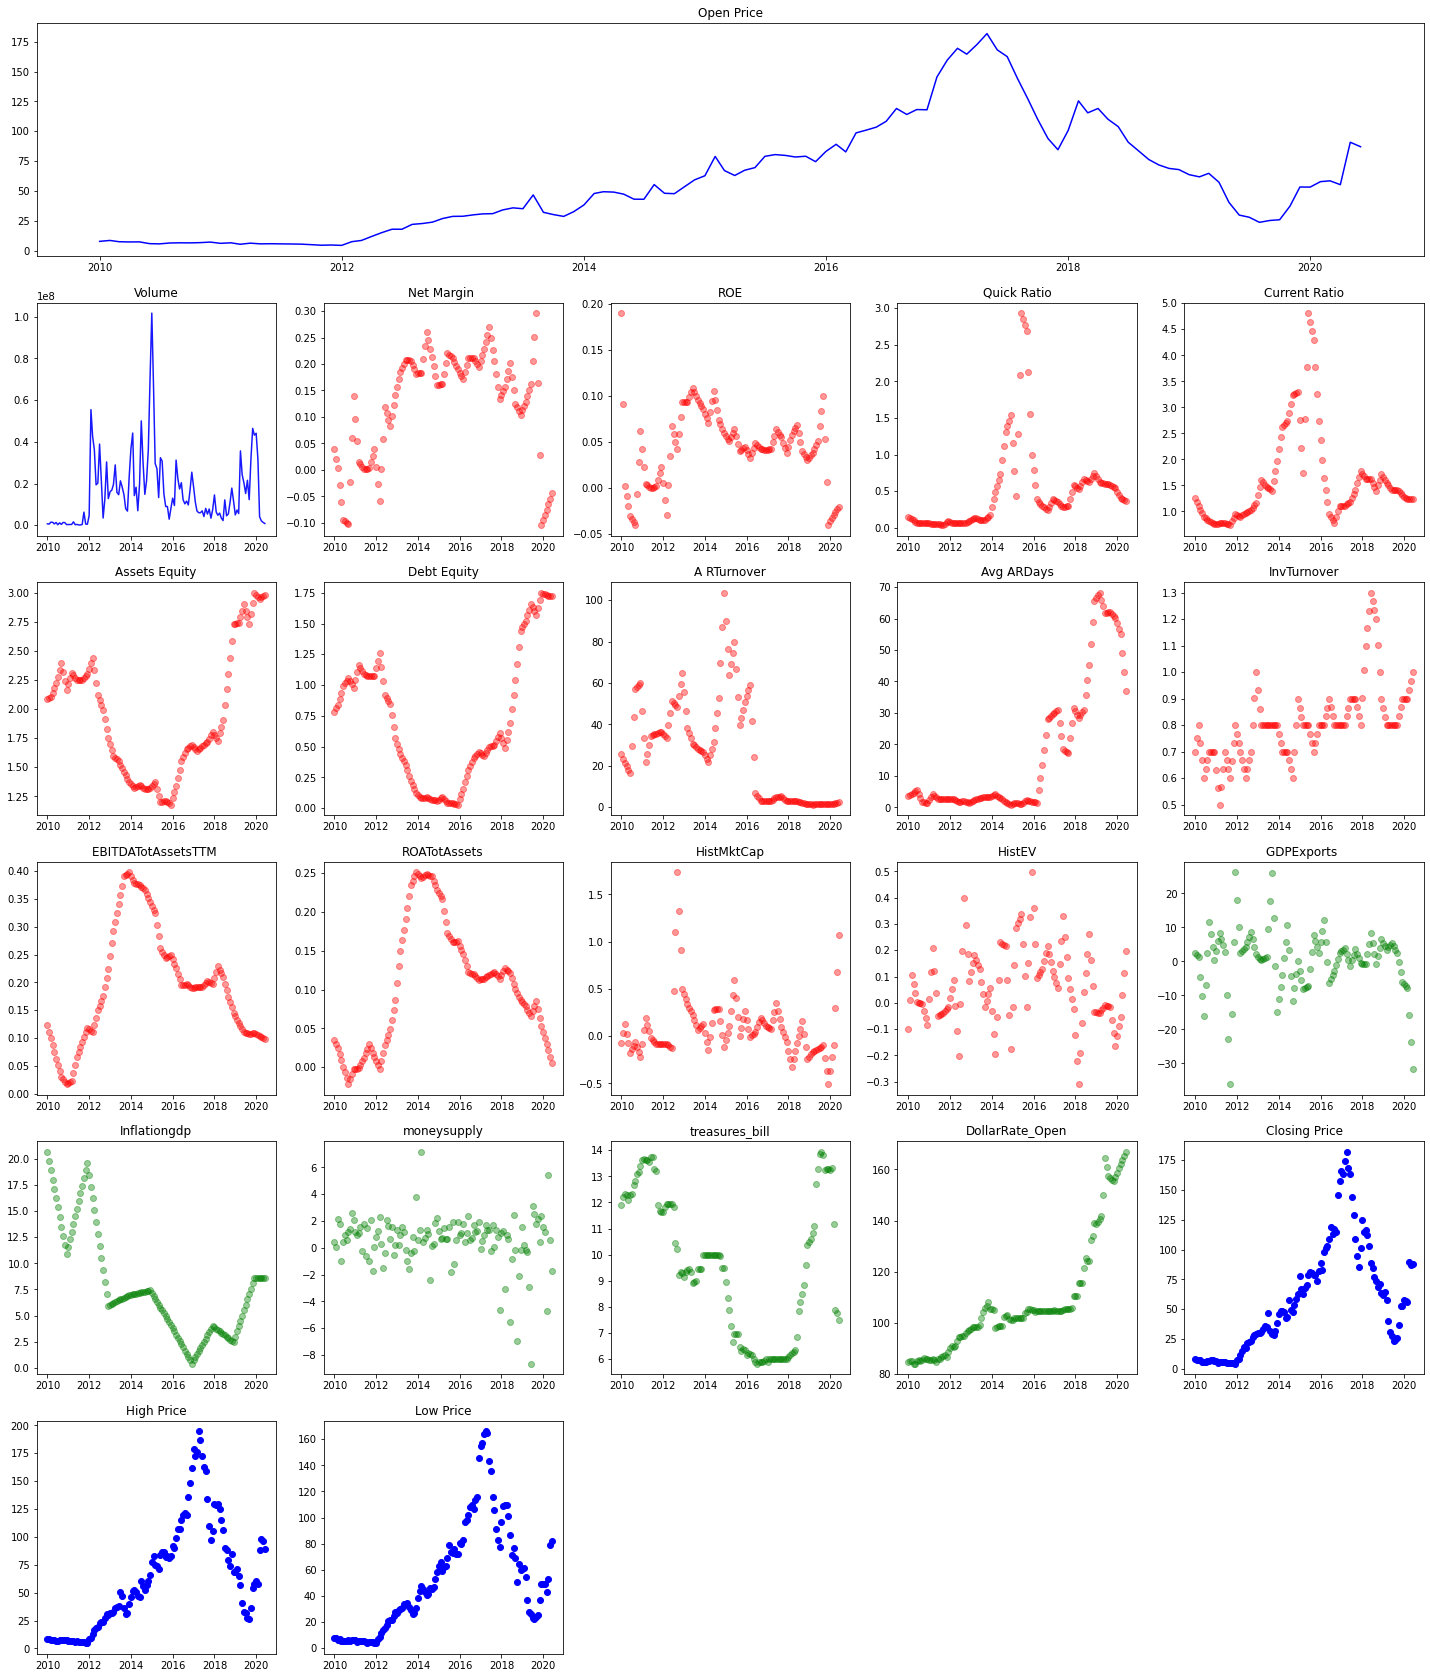

In [ ]:
fig = plt.figure(figsize=(30, 30))


ax1 = plt.subplot2grid((6,6), (0,0), rowspan= 1, colspan=5)
ax2 = plt.subplot2grid((6,6), (1,0), rowspan= 1, colspan=1)
ax3 = plt.subplot2grid((6,6), (1,1), rowspan= 1, colspan=1)
ax4 = plt.subplot2grid((6,6), (1,2), rowspan= 1, colspan=1)
ax5 = plt.subplot2grid((6,6), (1,3), rowspan= 1, colspan=1)
ax6 = plt.subplot2grid((6,6), (1,4), rowspan= 1, colspan=1)
ax7 = plt.subplot2grid((6,6), (2,0), rowspan= 1, colspan=1)
ax8 = plt.subplot2grid((6,6), (2,1), rowspan= 1, colspan=1)
ax9 = plt.subplot2grid((6,6), (2,2), rowspan= 1, colspan=1)
ax10 = plt.subplot2grid((6,6), (2,3), rowspan= 1, colspan=1)
ax11 = plt.subplot2grid((6,6), (2,4), rowspan= 1, colspan=1)
ax12 = plt.subplot2grid((6,6), (3,0), rowspan= 1, colspan=1)
ax13 = plt.subplot2grid((6,6), (3,1), rowspan= 1, colspan=1)
ax14 = plt.subplot2grid((6,6), (3,2), rowspan= 1, colspan=1)
ax15 = plt.subplot2grid((6,6), (3,3), rowspan= 1, colspan=1)
ax16 = plt.subplot2grid((6,6), (3,4), rowspan= 1, colspan=1)
ax17 = plt.subplot2grid((6,6), (4,0), rowspan= 1, colspan=1)
ax18 = plt.subplot2grid((6,6), (4,1), rowspan= 1, colspan=1)
ax19 = plt.subplot2grid((6,6), (4,2), rowspan= 1, colspan=1)
ax20 = plt.subplot2grid((6,6), (4,3), rowspan= 1, colspan=1)
ax21 = plt.subplot2grid((6,6), (4,4), rowspan= 1, colspan=1)
ax22 = plt.subplot2grid((6,6), (5,0), rowspan= 1, colspan=1)
ax23 = plt.subplot2grid((6,6), (5,1), rowspan= 1, colspan=1)
# ax24 = plt.subplot2grid((6,6), (5,2), rowspan= 1, colspan=1)
# ax25 = plt.subplot2grid((6,6), (5,3), rowspan= 1, colspan=1)
# ax26 = plt.subplot2grid((6,6), (5,4), rowspan= 1, colspan=1)


# plt.figure()
ax1.set_title('Open Price')
ax1.plot(df.index, df.Open,  c='b')

ax2.set_title('Volume')
ax2.plot(df.index, preprocessed_df['Vol'],  alpha=0.9, color='blue' )


ax3.scatter(df.index, df.Net_Margin,  alpha=0.4, color='red')
ax3.set_title('Net Margin ')


ax4.scatter(df.index, df.ROE,  alpha=0.4, color='red')
ax4.set_title('ROE')



ax5.scatter(df.index, df.Quick_Ratio,  alpha=0.4, color='red')
ax5.set_title('Quick Ratio')


ax6.scatter(df.index, df.Current_Ratio,  alpha=0.4, color='red')
ax6.set_title('Current Ratio')


ax7.scatter(df.index, df.Assets_Equity,  alpha=0.4, color='red')
ax7.set_title('Assets Equity')


ax8.scatter(df.index, df.Debt_Equity,  alpha=0.4, color='red')
ax8.set_title('Debt Equity')


ax9.scatter(df.index, df.A_RTurnover,  alpha=0.4, color='red')
ax9.set_title('A RTurnover')


ax10.scatter(df.index, df.AvgA_RDays,  alpha=0.4, color='red')
ax10.set_title('Avg ARDays')


ax11.scatter(df.index, df.InvTurnover,  alpha=0.4, color='red')
ax11.set_title('InvTurnover')


ax12.scatter(df.index, df.EBITDATotAssetsTTM,  alpha=0.4, color='red')
ax12.set_title('EBITDATotAssetsTTM ')


ax13.scatter(df.index, df.ROATotAssets,  alpha=0.4, color='red')
ax13.set_title('ROATotAssets')


ax14.scatter(df.index, df.HistMktCap,  alpha=0.4, color='red')
ax14.set_title('HistMktCap')


ax15.scatter(df.index, df.HistEV,  alpha=0.4, color='red')
ax15.set_title('HistEV')


ax16.scatter(df.index, df.GDPExports,  alpha=0.4, color='green')
ax16.set_title('GDPExports ')


ax17.scatter(df.index, df.Inflationgdp,  alpha=0.4, color='green')
ax17.set_title('Inflationgdp')


ax18.scatter(df.index, df.moneysupply,  alpha=0.4, color='green')
ax18.set_title('moneysupply')


ax19.scatter(df.index, df.treasures_bill,  alpha=0.4, color='green')
ax19.set_title('treasures_bill')


ax20.scatter(df.index, df.DollarRate_Open,  alpha=0.4, color='green')
ax20.set_title('DollarRate_Open')

ax21.scatter(df.index, preprocessed_df['Price'],  c='b' )
ax21.set_title('Closing Price')

ax22.scatter(df.index, preprocessed_df['High'],  c='b' )
ax22.set_title('High Price')

ax23.scatter(df.index, preprocessed_df['Low'],  c='b')
ax23.set_title('Low Price')

# ax1.scatter(x=df.index, y=df1.Net_Margin, marker='o', c='r')
# ax1.scatter(x=df.index, y=df.Net_Margin, marker='o', c='b')

plt.savefig('All variables.png', transparent=True)

plt.show();


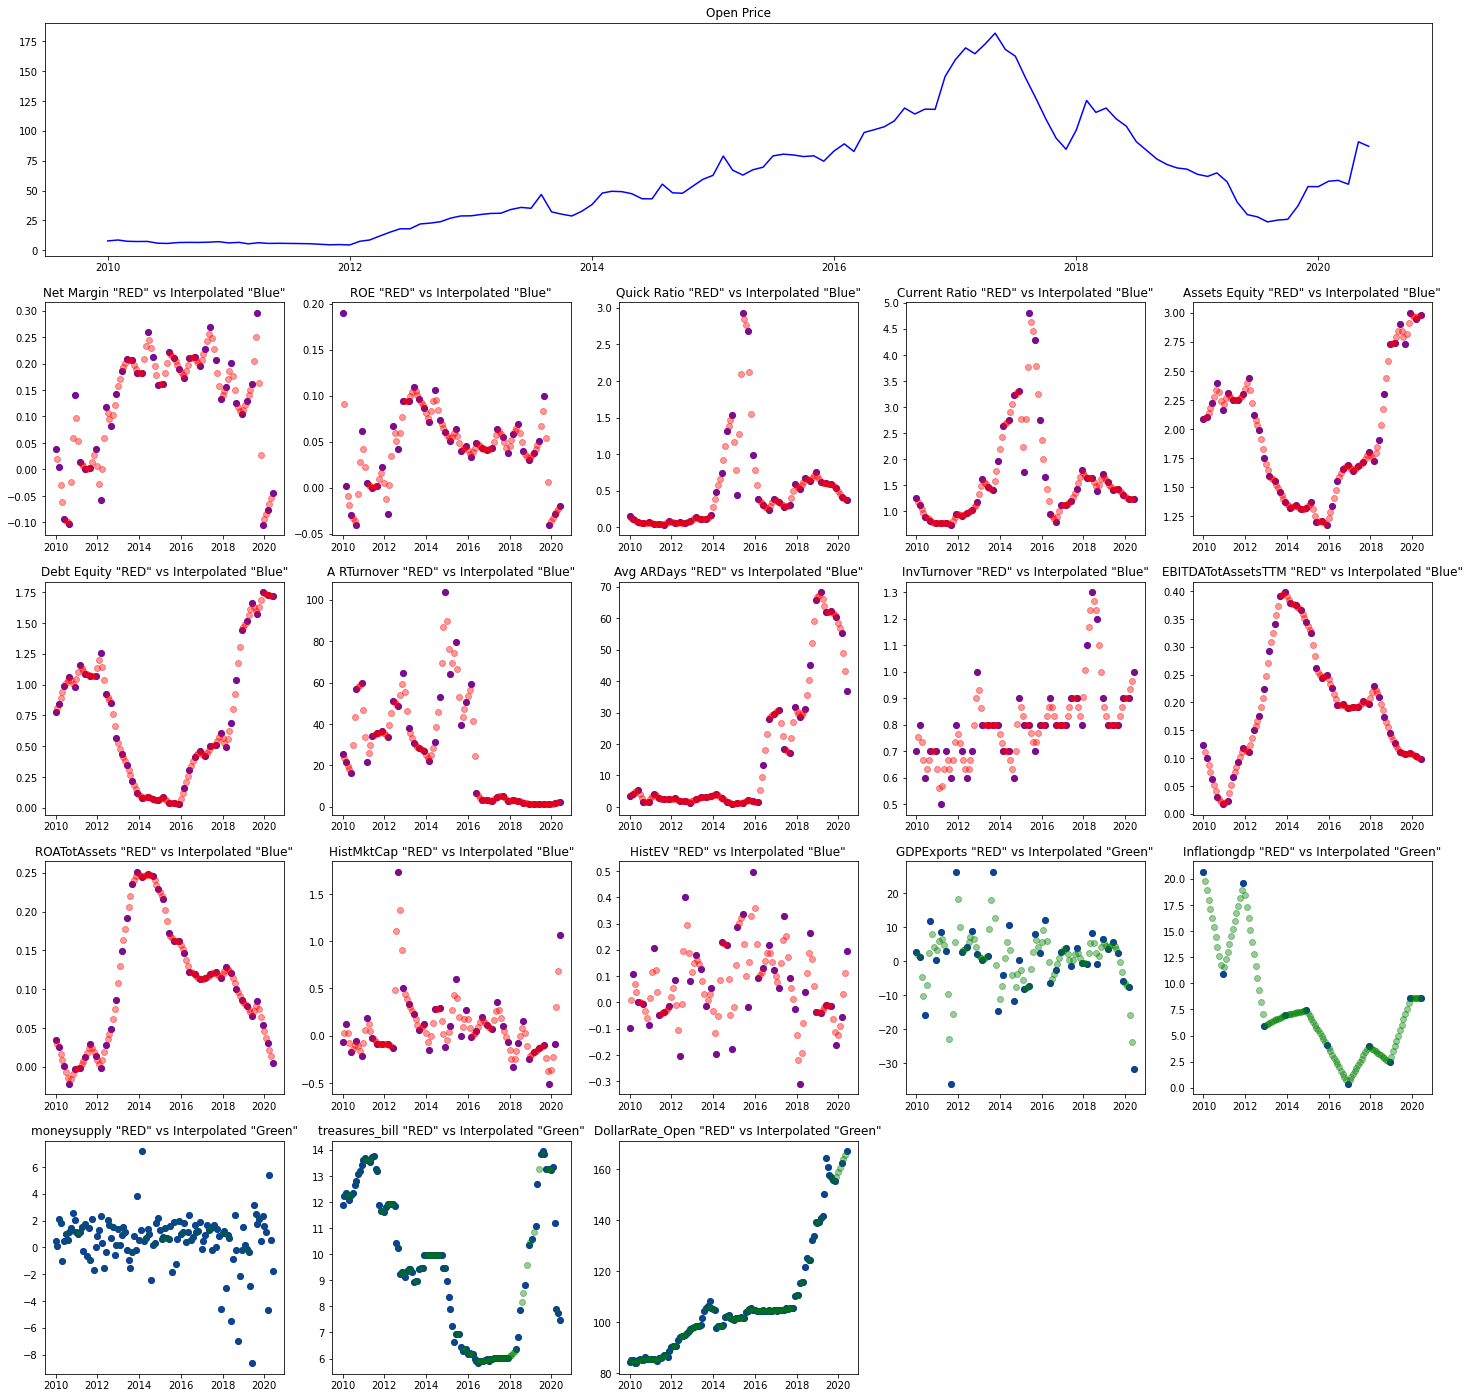

In [ ]:
fig = plt.figure(figsize=(30, 30))


ax1 = plt.subplot2grid((6,6), (0,0), rowspan= 1, colspan=5)
ax2 = plt.subplot2grid((6,6), (1,0), rowspan= 1, colspan=1)
ax3 = plt.subplot2grid((6,6), (1,1), rowspan= 1, colspan=1)
ax4 = plt.subplot2grid((6,6), (1,2), rowspan= 1, colspan=1)
ax5 = plt.subplot2grid((6,6), (1,3), rowspan= 1, colspan=1)
ax6 = plt.subplot2grid((6,6), (1,4), rowspan= 1, colspan=1)
ax7 = plt.subplot2grid((6,6), (2,0), rowspan= 1, colspan=1)
ax8 = plt.subplot2grid((6,6), (2,1), rowspan= 1, colspan=1)
ax9 = plt.subplot2grid((6,6), (2,2), rowspan= 1, colspan=1)
ax10 = plt.subplot2grid((6,6), (2,3), rowspan= 1, colspan=1)
ax11 = plt.subplot2grid((6,6), (2,4), rowspan= 1, colspan=1)
ax12 = plt.subplot2grid((6,6), (3,0), rowspan= 1, colspan=1)
ax13 = plt.subplot2grid((6,6), (3,1), rowspan= 1, colspan=1)
ax14 = plt.subplot2grid((6,6), (3,2), rowspan= 1, colspan=1)
ax15 = plt.subplot2grid((6,6), (3,3), rowspan= 1, colspan=1)
ax16 = plt.subplot2grid((6,6), (3,4), rowspan= 1, colspan=1)
ax17 = plt.subplot2grid((6,6), (4,0), rowspan= 1, colspan=1)
ax18 = plt.subplot2grid((6,6), (4,1), rowspan= 1, colspan=1)
ax19 = plt.subplot2grid((6,6), (4,2), rowspan= 1, colspan=1)


# ax24 = plt.subplot2grid((6,6), (5,2), rowspan= 1, colspan=1)
# ax25 = plt.subplot2grid((6,6), (5,3), rowspan= 1, colspan=1)
# ax26 = plt.subplot2grid((6,6), (5,4), rowspan= 1, colspan=1)


# plt.figure()
ax1.set_title('Open Price')
ax1.plot(df.index, df.Open,  c='b')



ax2.scatter(df.index, preprocessed_df['Net_Margin'],  alpha=0.9, color='blue' )
ax2.scatter(df.index, df.Net_Margin,  alpha=0.4, color='red')
ax2.set_title('Net Margin "RED" vs Interpolated "Blue"')

ax3.scatter(df.index, preprocessed_df['ROE'],  alpha=0.9, color='blue' )
ax3.scatter(df.index, df.ROE,  alpha=0.4, color='red')
ax3.set_title('ROE "RED" vs Interpolated "Blue"')


ax4.scatter(df.index, preprocessed_df['Quick_Ratio'],  alpha=0.9, color='blue' )
ax4.scatter(df.index, df.Quick_Ratio,  alpha=0.4, color='red')
ax4.set_title('Quick Ratio "RED" vs Interpolated "Blue"')

ax5.scatter(df.index, preprocessed_df['Current_Ratio'],  alpha=0.9, color='blue' )
ax5.scatter(df.index, df.Current_Ratio,  alpha=0.4, color='red')
ax5.set_title('Current Ratio "RED" vs Interpolated "Blue"')

ax6.scatter(df.index, preprocessed_df['Assets_Equity'],  alpha=0.9, color='blue' )
ax6.scatter(df.index, df.Assets_Equity,  alpha=0.4, color='red')
ax6.set_title('Assets Equity "RED" vs Interpolated "Blue"')

ax7.scatter(df.index, preprocessed_df['Debt_Equity'],  alpha=0.9, color='blue' )
ax7.scatter(df.index, df.Debt_Equity,  alpha=0.4, color='red')
ax7.set_title('Debt Equity "RED" vs Interpolated "Blue"')

ax8.scatter(df.index, preprocessed_df['A_RTurnover'],  alpha=0.9, color='blue' )
ax8.scatter(df.index, df.A_RTurnover,  alpha=0.4, color='red')
ax8.set_title('A RTurnover "RED" vs Interpolated "Blue"')

ax9.scatter(df.index, preprocessed_df['AvgA_RDays'],  alpha=0.9, color='blue' )
ax9.scatter(df.index, df.AvgA_RDays,  alpha=0.4, color='red')
ax9.set_title('Avg ARDays "RED" vs Interpolated "Blue"')

ax10.scatter(df.index, preprocessed_df['InvTurnover'],  alpha=0.9, color='blue' )
ax10.scatter(df.index, df.InvTurnover,  alpha=0.4, color='red')
ax10.set_title('InvTurnover "RED" vs Interpolated "Blue"')

ax11.scatter(df.index, preprocessed_df['EBITDATotAssetsTTM'],  alpha=0.9, color='blue' )
ax11.scatter(df.index, df.EBITDATotAssetsTTM,  alpha=0.4, color='red')
ax11.set_title('EBITDATotAssetsTTM "RED" vs Interpolated "Blue"')

ax12.scatter(df.index, preprocessed_df['ROATotAssets'],  alpha=0.9, color='blue' )
ax12.scatter(df.index, df.ROATotAssets,  alpha=0.4, color='red')
ax12.set_title('ROATotAssets "RED" vs Interpolated "Blue"')

ax13.scatter(df.index, preprocessed_df['HistMktCap'],  alpha=0.9, color='blue' )
ax13.scatter(df.index, df.HistMktCap,  alpha=0.4, color='red')
ax13.set_title('HistMktCap "RED" vs Interpolated "Blue"')

ax14.scatter(df.index, preprocessed_df['HistEV'],  alpha=0.9, color='blue' )
ax14.scatter(df.index, df.HistEV,  alpha=0.4, color='red')
ax14.set_title('HistEV "RED" vs Interpolated "Blue"')

ax15.scatter(df.index, preprocessed_df['GDPExports'],  alpha=0.9, color='blue' )
ax15.scatter(df.index, df.GDPExports,  alpha=0.4, color='green')
ax15.set_title('GDPExports "RED" vs Interpolated "Green"')

ax16.scatter(df.index, preprocessed_df['Inflationgdp'],  alpha=0.9, color='blue' )
ax16.scatter(df.index, df.Inflationgdp,  alpha=0.4, color='green')
ax16.set_title('Inflationgdp "RED" vs Interpolated "Green"')

ax17.scatter(df.index, preprocessed_df['moneysupply'],  alpha=0.9, color='blue' )
ax17.scatter(df.index, df.moneysupply,  alpha=0.4, color='green')
ax17.set_title('moneysupply "RED" vs Interpolated "Green"')

ax18.scatter(df.index, preprocessed_df['treasures_bill'],  alpha=0.9, color='blue' )
ax18.scatter(df.index, df.treasures_bill,  alpha=0.4, color='green')
ax18.set_title('treasures_bill "RED" vs Interpolated "Green"')

ax19.scatter(df.index, preprocessed_df['DollarRate_Open'],  alpha=0.9, color='blue' )
ax19.scatter(df.index, df.DollarRate_Open,  alpha=0.4, color='green')
ax19.set_title('DollarRate_Open "RED" vs Interpolated "Green"')



# ax1.scatter(x=df.index, y=df1.Net_Margin, marker='o', c='r')
# ax1.scatter(x=df.index, y=df.Net_Margin, marker='o', c='b')

plt.savefig('All interpolated variables.png', transparent=True)


plt.show();


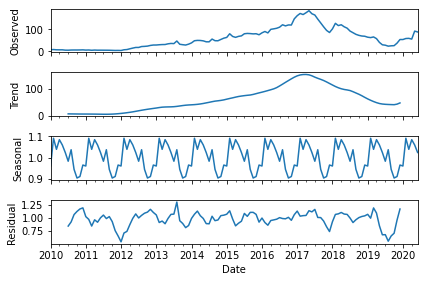

In [ ]:
result = seasonal_decompose(df.Open, model='multiplicative')    
result.plot()
plt.savefig('cherat-seasonal decomposition.png', transparent=True)
plt.show()

# Data Normalisation

In [ ]:
###Standardizing/Normalizing the data
scaler = StandardScaler()
scaler  = scaler.fit(df)
# scaler = StandardScaler.fit(df)
X_scaled = scaler.transform(df)
df_normalise = pd.DataFrame(X_scaled, columns=['Open', 'Vol', 'High', 'Low', 'Price', 'Net_Margin', 'ROE',
       'Quick_Ratio', 'Current_Ratio', 'Assets_Equity', 'Debt_Equity',
       'A_RTurnover', 'AvgA_RDays', 'InvTurnover', 'EBITDATotAssetsTTM',
       'ROATotAssets', 'HistMktCap', 'HistEV', 'GDPExports',
       'Inflationgdp', 'moneysupply', 'treasures_bill', 'DollarRate_Open'])

df_normalise['Date'] = df.index
df_normalise.set_index("Date", inplace= True) 


In [ ]:
#train = df_normalise.drop(['ROE','moneysupply'],axis='columns') 
train = df_normalise.iloc[:101]
#train.shape
#test = df_normalise.drop(['ROE','moneysupply'],axis='columns') 
test = df_normalise.iloc[101:]
test.shape

(25, 23)

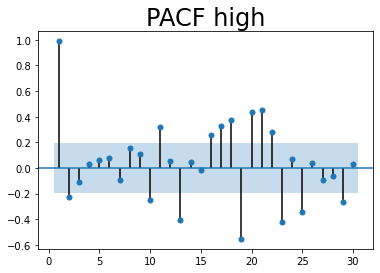

In [ ]:
#acf
# sgt.plot_acf(df_normalise.Open, lags=40, zero = False);

sgt.plot_pacf(train.Open, lags = 30, zero = False, method = ('ols'))

plt.title("PACF high", size = 24)

plt.savefig('pacf-sarimax.png', transparent=True)
plt.show()

In [ ]:
train_exog = train.drop(['Open'],axis='columns') 
train_exog = train_exog.iloc[:101]
#train_exog.shape
test_exog = test.drop(['Open'],axis='columns') 
test_exog.shape

(25, 22)

In [ ]:
#   SARIMAX model with check High Low function

parameters = []
for ar in range(1,11,1):
  for i in range(1,2,1):
    for ma in range(1,11,1):
      period = 11
      model = sm.tsa.SARIMAX(train.Open, order=(ar,i,ma), exog=train_exog, seasonal_order=(ar,i,ma,period))
      results = model.fit()
      print('Order =', ar, i, ma,period)
      print('Seasonal order =', ar, i, ma,period)
      print('AIC: ', results.aic)
      print('BIC: ', results.bic)
      parameters.append([ar,i,ma,ar,i,ma,period,results.aic,results.bic])
result_table = pd.DataFrame(parameters)
result_table.columns = ['ar','i','ma','(ar','i','ma','period)','aic','bic']
result_table = result_table.sort_values(by='aic',ascending = True).reset_index(drop = True)
print(result_table)
minimum = result_table['bic'].min()
minimumm = result_table['aic'].min()
a = result_table.loc[result_table['bic'] == minimum]
b = result_table.loc[result_table['aic'] == minimumm]
print(' The best combination that gives the lowest BIC is:')
print(a)

print(' The best combination that gives the lowest AIC is:')
print(b)
        

In [ ]:
model = sm.tsa.SARIMAX(train.Open, order=(1,1,5),exog=train_exog, seasonal_order=(1,1,5,12)) ## may b impress from the number of variables feeding more variables decreasing the mse....
results = model.fit()
results.summary()


# Sarimax Model fitting

In [ ]:
train_exog = train.drop(['Open','A_RTurnover','ROE','HistEV','Current_Ratio','EBITDATotAssetsTTM','Assets_Equity','Inflationgdp','GDPExports','moneysupply','treasures_bill','Net_Margin','InvTurnover','DollarRate_Open','HistMktCap','Debt_Equity','ROATotAssets','Vol'],axis='columns') 
train_exog = train_exog.iloc[:101]
#train_exog.shape
test_exog = test.drop(['Open','A_RTurnover','ROE','HistEV','Current_Ratio','EBITDATotAssetsTTM','Assets_Equity','Inflationgdp','GDPExports','moneysupply','treasures_bill','Net_Margin','InvTurnover','DollarRate_Open','HistMktCap','Debt_Equity','ROATotAssets','Vol'],axis='columns') 
test_exog.shape

In [ ]:
model = sm.tsa.SARIMAX(train.Open, order=(1,1,5),exog=train_exog, seasonal_order=(1,1,5,12)) ## may b impress from the number of variables feeding more variables decreasing the mse....
results = model.fit()
results.summary()

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start,end,exog=test_exog)

In [ ]:
predictions = predictions.reset_index(drop=True)
test.reset_index(level=['Date'],inplace =True)
test['Date'] = pd.to_datetime(test['Date'])  #convert ds to datetime index

# PLOTTING TEST VS PREDICTED 

Text(0.5, 1.0, 'Cherat cement actual vs predicted open price ')

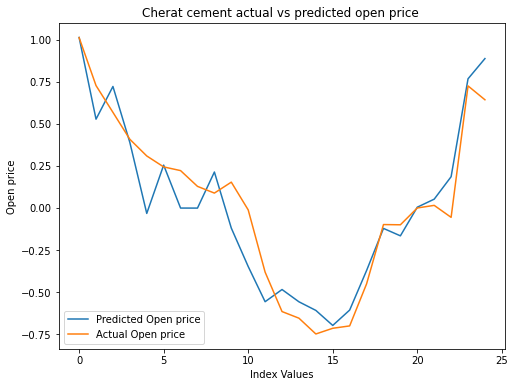

In [ ]:
predictions.plot(figsize=(8,6),legend=True, label='Predicted Open price')
test['Open'].plot(figsize=(8,6),legend=True, label='Actual Open price')
plt.xlabel("Index Values")
plt.ylabel("Open price")
plt.title("Cherat cement actual vs predicted open price ")

# MSE & RMSE

In [ ]:
def mse_rmse(test_variable,prediction_variable):
    a = rmse(test_variable,prediction_variable)
    b = mse(test_variable,prediction_variable)
    print('rmse =', a)
    print('mse =', b)

In [ ]:
mse_rmse(test['Open'],predictions)  

rmse = 0.16369736828830975
mse = 0.026796828384518516


In [ ]:
# Saving model in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls
%pwd
%cd /content
%ls

 adc.json                             drive/
'All interpolated variables.png'      model.pkl
'All variables.png'                   pacf-sarimax.png
 cherat-final-dataset.csv             sample_data/
'cherat-seasonal decomposition.png'
/content
 adc.json                             drive/
'All interpolated variables.png'      model.pkl
'All variables.png'                   pacf-sarimax.png
 cherat-final-dataset.csv             sample_data/
'cherat-seasonal decomposition.png'


In [ ]:
%cd drive/

/content/drive


In [ ]:
%cd MyDrive/

/content/drive/MyDrive


In [ ]:
%cd tensorboard/
%cd all-new-models/
%cd financial variables/
%ls

[Errno 2] No such file or directory: 'tensorboard/'
/content/drive/My Drive/tensorboard/all-new-models
[Errno 2] No such file or directory: 'all-new-models/'
/content/drive/My Drive/tensorboard/all-new-models
/content/drive/My Drive/tensorboard/all-new-models/financial variables
 final_Sarimax_Cherat_Final.ipynb
'final_Sarimax_Steel_Final_(1).ipynb'
'google_final_monthly_steel_SARMAX_allvariables_latest_(1).ipynb'
'google_monthly_cherat_SARMAX_allvariables_latest_(1).ipynb'
'google_monthly_ogdc_SARMAX_allvariables_latest_(1).ipynb'
 monthly_ogdc_SARIMAX.ipynb


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [ ]:
# save model
SARIMAXResults.save(results,'model.pkl')

In [ ]:
model = sm.tsa.SARIMAX(train.Open, order=(1,1,5),exog=train_exog, seasonal_order=(4,1,1,12)) ## may b impress from the number of variables feeding more variables decreasing the mse....
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Open   No. Observations:                  101
Model:             SARIMAX(1, 1, 5)x(4, 1, [1], 12)   Log Likelihood                 113.885
Date:                              Mon, 24 May 2021   AIC                           -193.770
Time:                                      06:53:28   BIC                           -151.655
Sample:                                  01-01-2010   HQIC                          -176.803
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
High           -0.3612      0.059     -6.157      0.000      -0.476      -0.246
Low             0.5054      0.066      7.614      0.000       0.375       0.635
Price           0.8304      0.073     11.414      0.000       0.688       0.973
Quick_Ratio    -0.0358      0.012     -3.056      0.002      -0.059      -0.013
AvgA_RDays     -0.1106      0.051     -2.179      0.029      -0.210      -0.011
ar.L1           0.3936      0.316      1.244      0.213      -0.226       1.014
ma.L1          -0.9760      0.369     -2.643      0.008      -1.700      -0.252
ma.L2           0.2346      0.293      0.800      0.424      -0.340       0.809
ma.L3          -0.0591      0.196     -0.301      0.763      -0.444       0.326
ma.L4           0.3658      0.195      1.880      0.060      -0.016       0.747
ma.L5          -0.4311      0.123     -3.516      0.000      -0.671      -0.191
ar.S.L12       -0.4019      2.215     -0.181      0.856      -4.744       3.940
ar.S.L24       -0.0598      1.087     -0.055      0.956      -2.191       2.071
ar.S.L36       -0.1437      0.265     -0.543      0.587      -0.662       0.375
ar.S.L48       -0.2501      0.361     -0.693      0.488      -0.957       0.457
ma.S.L12       -0.0744      2.302     -0.032      0.974      -4.587       4.438
sigma2          0.0040      0.001      6.140      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                30.27
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              22.75   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""